In [ ]:
print("Hello World")

Hello World


In [ ]:
2+3

5

In [ ]:
import numpy as np


# NQueen Problem
In a N-queen problem, a nxn chess grid is given where one has to put n queens in such a way that no two queens are attacking each other. Here n is an integer > 3.

## Assignment Problem

The N-Queen problem is firstly an assignment problem. There are similar problems.

1.   Graph Coloring Problem
2.   Vehicle Routing Problem
3.   Routine Assignment Problem
4.   Machine allocation problem in Cloud


### What are the variables?
Here, the queens are variables. For each of the queens, we have to assign them a row and a column.

### What are their domains / values that they can take?

Q =[1,2,1,3]

Q0 = 0,1

Q1 = 1,2

Q2 = 2,1

Q3 = 3,3


## Constraint satisfaction problem
There are a number of constraints for this problem:

1. Row Constraint
2. Column Constraint
3. Diagonal Constraint

We can easily incorporate the constraints (row constraint) to the variable encodings to reduce the domain.

## Optimization Problem
Sometimes, we have an optimization component as well. We often get an objective fucntion which can be thought of as a maximization/minimization problem.

In case of N-Queen, we can come up with a objective function as well. Number of constraint violations -- we can minimize it. In this way, we get an optimization problem.

In [ ]:
def printSolution(x):
  if x is None:
    print("No Solution")
    return
  for i in range(len(x)):
    for j in range(len(x)):
      if j == x[i]:
        print("Q",end=' ')
      else:
        print("0",end=' ')
    print("")

In [ ]:
printSolution([1,2,1,3])

0 Q 0 0 
0 0 Q 0 
0 Q 0 0 
0 0 0 Q 


In [ ]:
printSolution([2,0,3,1])

0 0 Q 0 
Q 0 0 0 
0 0 0 Q 
0 Q 0 0 


### Satisfy

This function takes as input the solution to the problem, which is an assignment of all the varialbes. Then it checks for all the constraints if they are satisfied or not.

In [ ]:
def satisfy(x):
  #flag=True
  n = len(x)
  for i in range(n-1):
    #print(i)
    for j in range(i+1,n):
      #print(j)
      if x[i]== x[j]:  # column same
        return False
      if abs (x[i]-x[j]) == abs(i-j): # diagonal case
        return False
  return True

In [ ]:
x=[2,0,3,1]
printSolution(x)
satisfy(x)

0 0 Q 0 
Q 0 0 0 
0 0 0 Q 
0 Q 0 0 


True

## Monte Carlo Sampling

The idea of Monte Carlo samppling is very simple, It randomly generates values for all the variables. Here in the case of N-Queen problem it is to generate the column numbers for all the queens. Note that, the positions here are integers. That is why it is possible to use a integer random number generator. Now, after all the values are generated, then we have to check if the generated solution satisfy all the constraints or not. We use the satisfy function for that.

In [ ]:
import random

def MonteCarlo(n,maxSteps):
  for i in range(maxSteps):
    x=np.zeros(n) # x =[]
    for j in range(n):
      value= random.randint(0, n-1)
      x[j]=value # x.append(value)
    #printSolution(x)
    if satisfy(x):
      return x
  return None



In [ ]:
printSolution(MonteCarlo(6,500))

No Solution


In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
abs(-3)

3

## CSPlib

[Click Here](http://www.csplib.org/Problems/categories.html)

You can select any problem from there or create a real  life problem of your own to solve.

## Optimization

We will write the objective function

fitness(x) return number of constraints violated

best fitness = 0 # no constraints are violated

In [ ]:
def fitness(x):
  f = 0
  n = len(x)
  for i in range(n-1):
    #print(i)
    for j in range(i+1,n):
      #print(j)
      if x[i]== x[j]:  # column same
        f = f + 1
      if abs (x[i]-x[j]) == abs(i-j): # diagonal case
        f = f + 1
  return f

In [ ]:
fitness([0,5,3,1,2,6,4])

5

In [ ]:
satisfy([2,4,1,3,0])

True

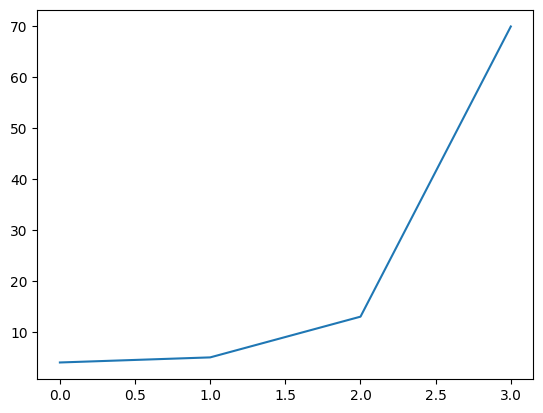

In [ ]:
import matplotlib.pyplot as plt
plt.plot([0,1,2,3],[4,5,13,70])
#plt.scatter([0,1,2,3],[4,5,13,70])
#plt.bar([0,1,2,3],[4,5,13,70])
plt.show()

## Neighborhood

For our N-queen, what is neighborhood?

x = [0 , 1, 1, 2]

**action  = single queen random move (singleFlip)**

x = [ 1, 1, 1, 2]
x = [ 2, 1, 1, 2]
x = [ 3, 1, 1, 2]

x = [ 0, 0, 1, 2]
x = [ 0, 2, 1, 2]
x = [ 0, 3, 1, 2]

x = [0 , 1, 0, 2]
x = [0 , 1, 2, 2]
x = [0 , 1, 3, 2]


x = [0 , 1, 1, 0]
x = [0 , 1, 1, 1]
x = [0 , 1, 1, 3]

So in total = 4x3 = 12 solutions in the neighborhood


What will be the size of the neighborhood if N=6? Lets assume action is **single queen random move**.

6x5 = 30

What will be the size of the neighborhood if N=6? Lets assume action is **any queen random move**.

5 x 5 x 5 x 5 x 5 x 5 = 5^6



In [ ]:
import copy
def singleFlip(x):
  x_copy = copy.deepcopy(x) # simply copies the elements of x into x_copy
  n = x_copy.shape[0] # tries to find out the value of n

  queen = random.randint(0, n-1) # selects a random queen
  position = random.randint(0, n-1)  # selects a random position

  x_copy[queen] = position
  return x_copy


In [ ]:
print(singleFlip(np.asarray([0 , 1, 1, 2])))

[0 3 1 2]


# Random Neighborhood Search

In [ ]:
# initialization function
def init(n):
  x = np.zeros(n)
  for j in range(n):
      x[j]=random.randint(0, n-1)
  return x

In [ ]:
def RandomNeighborhoodSearch(n,maxSteps):

  x_axis=[]
  y_axis=[]

  # initialization
  x = init(n)
  # first check if the initilization was the solution
  if satisfy(x):
    return x

  # otherwise go for the loop
  for i in range(maxSteps):
    x_new = singleFlip (x) # now apply the action to get a new solution from the neighborhood

    x_axis.append(i)
    y_axis.append(fitness(x_new))

    if satisfy(x_new):
      return [x_new,x_axis,y_axis]
    x = x_new  # otherwise x_new is your new solution

  # if it is here that means no solutions were found
  return [None,x_axis,y_axis]


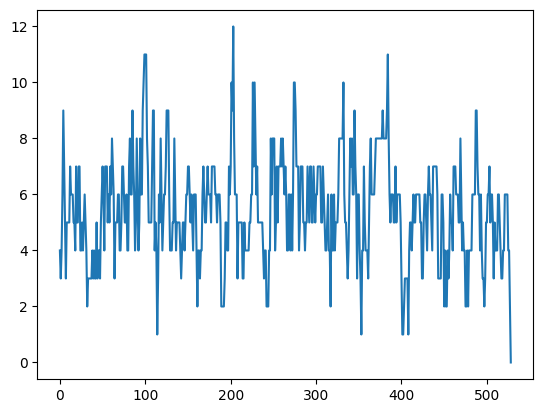

0 0 0 0 Q 0 
0 0 Q 0 0 0 
Q 0 0 0 0 0 
0 0 0 0 0 Q 
0 0 0 Q 0 0 
0 Q 0 0 0 0 


In [ ]:
x,x_axis,y_axis = RandomNeighborhoodSearch(6,10000)
plt.plot(x_axis,y_axis)
plt.show()
printSolution(x)

How can we compare two algorithms?
1. Average Time
2. Average Iteration
3. Averate Success Rate

In [ ]:
def HillDescent(n,maxSteps):  # HillClimbing

  x_axis=[]
  y_axis=[]

  # initialization
  x = init(n)
  # first check if the initilization was the solution
  if satisfy(x):
    return x

  # otherwise go for the loop
  for i in range(maxSteps):
    x_new = singleFlip (x) # now apply the action to get a new solution from the neighborhood

    x_axis.append(i)
    y_axis.append(fitness(x))

    if satisfy(x_new):
      return [x_new,x_axis,y_axis]
    if fitness(x_new) <= fitness(x):
      x = x_new  # otherwise x_new is your new solution
    #print(fitness(x))

  # if it is here that means no solutions were found
  return [None,x_axis,y_axis]


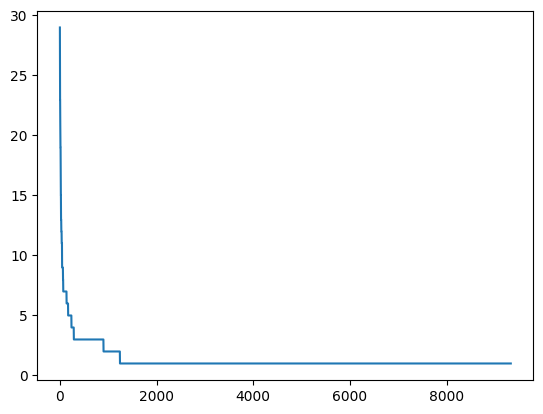

0 0 0 0 0 0 0 0 0 0 0 0 0 Q 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 Q 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 Q 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 Q 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 Q 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 Q 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 Q 0 0 0 0 0 
0 0 0 0 0 Q 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 Q 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 Q 
0 0 0 0 Q 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 Q 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 Q 0 
0 0 0 0 0 0 0 0 0 0 0 0 Q 0 0 0 0 0 0 0 
0 0 Q 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 Q 0 0 
0 0 0 0 0 0 0 Q 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 Q 0 0 0 0 0 0 0 0 0 0 
Q 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 Q 0 0 0 0 


In [ ]:
x,x_axis,y_axis = HillDescent(20,10000)
plt.plot(x_axis,y_axis)
plt.show()
printSolution(x)

## Stagnation

Sometimes our search algorithm gets stuck


*   Local Minima / Maxima (In a neighbor if a solution's fitness is minimum then it is called local minima)
*   Shoulder / Plateau

## How to overcome stagnation
*  take bad steps
*  restart the search after a certain time
*  keep memory, and go back to a previous solution




## Lets learn a new action / new Neighborhood

* Recombination


[0,1,  ||  3,4,5,2]   and [5,4,|| 3,1,0,2]  parents

[0,1,3,1,0,2] and [5,4,3,4,5,2]  children

In [ ]:
# 0 c 1 c 2 c 3 c 4 c 5
def crossover(p1,p2):
  n = p1.shape[0]
  crossoverPoint = random.randint(1, n-1)
  #print(crossoverPoint)
  #print(np.concatenate((p1[:crossoverPoint],p2[crossoverPoint:]),axis=0))
  #print(np.concatenate((p2[:crossoverPoint],p1[crossoverPoint:]),axis=0))
  c1 = np.concatenate((p1[:crossoverPoint],p2[crossoverPoint:]),axis=0)
  c2 = np.concatenate((p2[:crossoverPoint],p1[crossoverPoint:]),axis=0)

  return [c1,c2]



In [ ]:
c1,c2= crossover(np.asarray([0,1,3,4,2,5]),np.asarray([5,4,3,1,2,0]))
print(c1)
print(c2)

[0 4 3 1 2 0]
[5 1 3 4 2 5]


In [ ]:
a=[0,1,2,3,4,5,6]
b=[7,8,9,10,11,12]

In [ ]:
a[:5] + b[5:]

[0, 1, 2, 3, 4, 12]

In [ ]:
b[:2]+a[2:]

[7, 8, 2, 3, 4, 5, 6]

## Genetic Algorithm

* Single Point / Candidate Search : They maintain only single candidate x and improves over it (Hill Descent)

* Population based search: They maintain a set of x and  improves over them (Genetic Algorithm)

Exploration vs Exploitation

In [ ]:
def BasicGeneticAlgorithm(n,maxSteps,populationSize):
  # initialization
  P = [] # set of solutions, population
  for i in range(populationSize):
    x = init(n)
    P.append(x)
  # now check if the initial population has got the solution
  for x in P:
    if satisfy(x):
      return x
  # main loop
  for i in range(maxSteps):
    P_new =[]
    # now start the loop for crossover
    for j in range((int)(populationSize/2)):
      p1 = P[random.randint(0, populationSize-1)]# select parent 1
      p2 = P[random.randint(0, populationSize-1)]# select parent 2
      # there is a risk that we might select same parents p1==p2
      c1,c2=crossover(p1,p2)
      # add these new offspring to the new population
      P_new.append(c1)
      P_new.append(c2)
    # end of cross over

    # one form could be that old ones die and new ones stay
    for x in P_new:
      if satisfy(x):
        return x
    # accepts the new generation as new population
    P=P_new

  return False

In [ ]:
BasicGeneticAlgorithm(5,20000,50)

array([0., 3., 1., 4., 2.])

In [ ]:
def GeneticAlgorithm_1(n,maxSteps,populationSize):
  x_axis=[]
  y_axis=[]

  # initialization
  P = [] # set of solutions, population
  for i in range(populationSize):
    x = init(n)
    P.append(x)
  # now check if the initial population has got the solution
  for x in P:
    if satisfy(x):
      return [x,x_axis,y_axis]
  # main loop
  for i in range(maxSteps):
    P_new =[]
    # now start the loop for crossover
    for j in range((int)(populationSize/2)):
      p1 = P[random.randint(0, populationSize-1)]# select parent 1
      p2 = P[random.randint(0, populationSize-1)]# select parent 2
      # there is a risk that we might select same parents p1==p2
      c1,c2=crossover(p1,p2)
      # add these new offspring to the new population
      P_new.append(c1)
      P_new.append(c2)
    # end of cross over

    # one form could be that old ones die and new ones stay
    for x in P_new:
      if satisfy(x):
        return [x,x_axis,y_axis]

    # selection according to fitness - Elitism / Exploitation
    P_merge = P + P_new
    P_merge.sort(key=fitness)
    P = P_merge[:populationSize]

    x_axis.append(i)
    y_axis.append(fitness(P[0]))

  return [None,x_axis,y_axis]

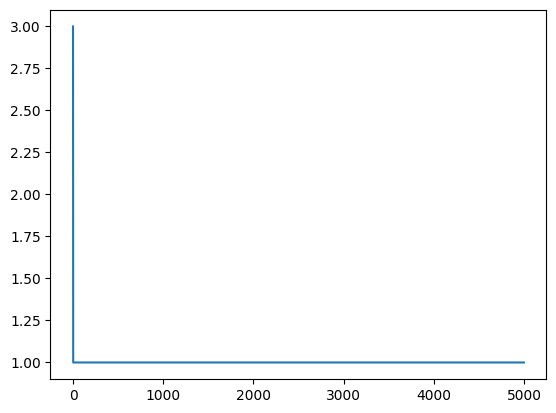

No Solution
5000


In [ ]:
x,x_axis,y_axis= GeneticAlgorithm_1(5,5000,10)
plt.plot(x_axis,y_axis)
plt.show()
printSolution(x)
print(len(x_axis))

In [ ]:
a = [10,20,5,4]

In [ ]:
a.sort()
print(a)

[4, 5, 10, 20]


In [ ]:
b = [1,2,3,4,5,6,7,8,9,10]

In [ ]:
b[:5]

[1, 2, 3, 4, 5]

In [ ]:
def GeneticAlgorithm_2(n,maxSteps,populationSize):
  x_axis=[]
  y_axis=[]

  # initialization
  P = [] # set of solutions, population
  for i in range(populationSize):
    x = init(n)
    P.append(x)
  # now check if the initial population has got the solution
  for x in P:
    if satisfy(x):
      return [x,x_axis,y_axis]
  # main loop
  for i in range(maxSteps):
    P_new =[]
    # now start the loop for crossover & mutation
    for j in range((int)(populationSize/2)):
      p1 = P[random.randint(0, populationSize-1)]# select parent 1
      p2 = P[random.randint(0, populationSize-1)]# select parent 2
      # there is a risk that we might select same parents p1==p2
      c1,c2=crossover(p1,p2)
      # add these new offspring to the new population
      P_new.append(c1)
      P_new.append(c2)

      P_new.append(singleFlip(c1))
      P_new.append(singleFlip(c2))


    # end of cross over

    # one form could be that old ones die and new ones stay
    for x in P_new:
      if satisfy(x):
        return [x,x_axis,y_axis]

    # selection according to fitness - Elitism / Exploitation
    P_merge = P + P_new
    P_merge.sort(key=fitness)
    P = P_merge[:populationSize]

    x_axis.append(i)
    y_axis.append(fitness(P[0]))

  return [None,x_axis,y_axis]

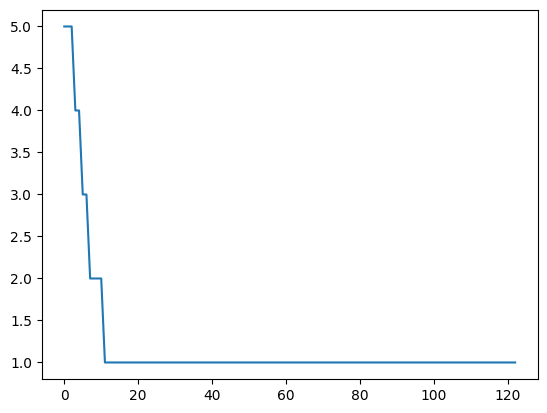

0 0 0 0 0 0 0 Q 0 0 
0 0 Q 0 0 0 0 0 0 0 
Q 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 Q 
0 0 0 0 Q 0 0 0 0 0 
0 0 0 0 0 0 0 0 Q 0 
0 0 0 0 0 Q 0 0 0 0 
0 0 0 Q 0 0 0 0 0 0 
0 Q 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 Q 0 0 0 
123


In [ ]:
x,x_axis,y_axis= GeneticAlgorithm_2(10,5000,10)
plt.plot(x_axis,y_axis)
plt.show()
printSolution(x)
print(len(x_axis))

In [ ]:
def PopulationHillDescent(n,maxSteps,populationSize):  # HillClimbing

  x_axis=[]
  y_axis=[]

  # initialization
  P=[]
  for i in range(populationSize):
    P.append(init(n))

  # first check if the initilization was the solution
  for x in P:
    if satisfy(x):
      return x

  # otherwise go for the loop
  for i in range(maxSteps):

    P_new=[]

    for x in P:
      x_new = singleFlip (x) # now apply the action to get a new solution from the neighborhood
      if satisfy(x_new):
        return [x_new,x_axis,y_axis]
      if fitness(x_new) <= fitness(x):
        #x = x_new  # otherwise x_new is your new solution
        P_new.append(x_new)
      else:
        P_new.append(x)

    P = P_new

    #P.sort(key=fitness)
    x_axis.append(i)
    y_axis.append(fitness(P[0]))

  # if it is here that means no solutions were found
  return [None,x_axis,y_axis]


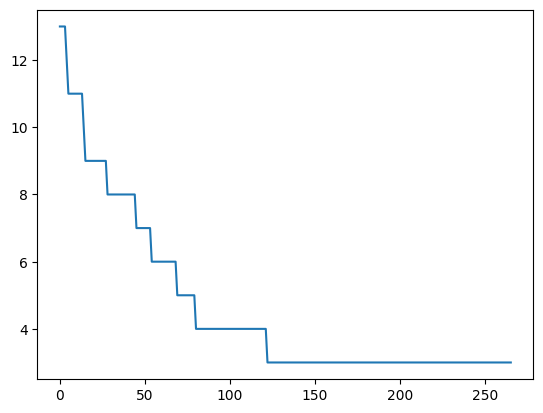

0 0 0 0 0 0 0 0 Q 0 0 0 0 0 0 
0 0 0 Q 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 Q 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 Q 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 Q 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 Q 
Q 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 Q 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 Q 0 
0 0 0 0 0 0 0 0 0 Q 0 0 0 0 0 
0 0 0 0 0 0 Q 0 0 0 0 0 0 0 0 
0 Q 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 Q 0 0 0 
0 0 Q 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 Q 0 0 
266


In [ ]:
x,x_axis,y_axis= PopulationHillDescent(15,5000,100)
plt.plot(x_axis,y_axis)
plt.show()
printSolution(x)
print(len(x_axis))

In [ ]:
a = [0,1,2,3,4]

In [ ]:
random.choices(a,[0.08,0.06,0.06,0.4,0.4],k=3)

[4, 4, 4]

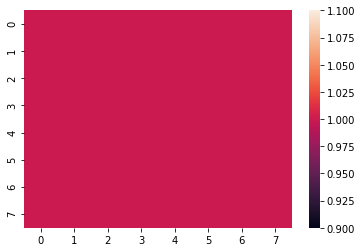

In [ ]:
n=8
Pheromone = np.ones((n,n))
import seaborn as sns
ax = sns.heatmap(Pheromone)

In [ ]:
maxSteps = 10000
numAnts = 100
rho = 0.05
Q = 0.01
found = False
for i in range(maxSteps): # outer loop decides how many iterations
  # run all ants
  S = []
  for j in range(numAnts): # for each ant
    x = np.zeros(n)
    for k in range(n):
      x[k]=random.choices(range(n),Pheromone[k,:])[0]
    # if we update pheromone here, then the next ant will get the updated pheromone
    S.append(x) # append all the solutions found by ants into an array
  Pheromone = (1-rho)* Pheromone
  # now use S to update the pheromone
  # now suppose we decide all ants will update the pheromone
  for x in S:
    L = fitness(x)
    if L == 0:
      print(x)
      print(i)
      found = True
      break
    # now update
    for k in range(n):
      Pheromone[k,int(x[k])] += Q / L

  if found == True:
    break

ax = sns.heatmap(Pheromone)

KeyboardInterrupt: ignored

In [ ]:
Pheromone

array([[0.14516628, 0.61661805, 0.20683241, 0.21489088, 0.09445672,
        0.48064862, 0.23730168],
       [0.05913742, 0.71528137, 0.26185243, 0.52929925, 0.13447902,
        0.13640145, 0.15946371],
       [0.07382345, 0.2039542 , 0.15705576, 0.07997629, 0.05784206,
        0.15528721, 1.26797568],
       [0.61144207, 0.09398837, 0.13832241, 0.13164789, 0.2586406 ,
        0.13461768, 0.62725563],
       [0.84976338, 0.14395796, 0.12862874, 0.34879921, 0.08972819,
        0.25819786, 0.17683931],
       [0.50951805, 0.30555646, 0.35411452, 0.16928586, 0.21951737,
        0.20931509, 0.2286073 ],
       [0.2886746 , 0.13999901, 0.0715937 , 0.09541238, 0.88959963,
        0.41511035, 0.09552498]])